In [12]:
# Import libraries
import numpy as np
import math
import random
import pandas as pd

import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
from scipy.special import gammaln

import statsmodels.api as sm # linear regression

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import os

# Directory path
myDir = "/Users/junjie/Desktop/OneDrive - The University of Chicago (1)/simulation_prox/simulation_figures/"
os.chdir(myDir)
import ProxseqClasses as PC

#*****
mpl.rcdefaults()
# Set font to be arial
mpl.rc('font', **{'sans-serif':'Arial', 'size':12})
mpl.rcParams['mathtext.rm'] = 'sans' # to have non-italic greek letter, use r'$\mathrm{\alpha}$', does NOT work with f-string
mpl.rcParams['axes.titlesize'] = 12
# Set default tick size
mpl.rcParams['xtick.major.size'] = 5.5
mpl.rcParams['ytick.major.size'] = 5.5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['ytick.minor.size'] = 2.5
# Default legend settings
mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.edgecolor'] = 'k'
#*****
# Seed number
np.random.seed(2019)
random.seed(2019)

#%% Simulation parameters
# Define the circle diameter in nm, centered at 0
d = 10000

# PLA ligation distance in nm (two antibodies within this distance can be ligated)
PLA_dist = 50

# Binomial distribution
p = (PLA_dist/d)**2

In [13]:
#Low signal and high noise 
num_complex = np.zeros((5,5))
num_complex[0,0] = 300
num_complex[0,1] = 150
num_complex[1,0] = 150
num_complex[0,2] = 200
num_complex[2,0] = 200
num_complex[1,1] = 300
num_complex[2,2] = 200
num_complex[0,3] = 100
num_complex[3,0] = 100

probeA = np.array([3000,1000,3000,1000,1000])
probeB = np.array([3000,1000,3000,1000,1000])

sim1 = PC.simulatePLA(n_cells=100, cell_d=d, PLA_dist=PLA_dist,
                      seed_num=2019, protein_variance=True,  ligate_all=False)
sim1.simulate(num_complex, probeA, probeB)
dge = PC.plaObject(sim1.pla_count)
dge2 = PC.plaObject(sim1.pla_count)
dge3 = PC.plaObject(sim1.pla_count)
dge4 = PC.plaObject(sim1.pla_count)

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2019.
2023-04-03 18:07:18     Start simulation
2023-04-03 18:07:41     Processed     10 cells
2023-04-03 18:07:50     Processed     20 cells
2023-04-03 18:07:54     Processed     30 cells
2023-04-03 18:08:05     Processed     40 cells
2023-04-03 18:08:15     Processed     50 cells
2023-04-03 18:08:25     Processed     60 cells
2023-04-03 18:08:30     Processed     70 cells
2023-04-03 18:08:39     Processed     80 cells
2023-04-03 18:08:54     Processed     90 cells
2023-04-03 18:09:03     Processed    100 cells


In [14]:
dge.predictComplex()
dge2.predictComplex(df_guess = pd.DataFrame(np.ones(dge2.shape)).copy())
dge3.predictComplex(df_guess = pd.DataFrame(np.full(dge3.shape,50)).copy())
dge4.predictComplex(df_guess = pd.DataFrame(np.full(dge4.shape,100)).copy())

predictComplex done: Loop number 200, tolerance 2.35
predictComplex done: Loop number 27, tolerance 0.91
predictComplex done: Loop number 200, tolerance 5.11
predictComplex done: Loop number 3, tolerance 0.00


/Users/junjie/Desktop/OneDrive - The University of Chicago (1)/Python/simulation_reproduce figures/ProxseqClasses.py:812: RuntimeWarning: divide by zero encountered in divide
  temp_expected = temp_pla_probeA[temp_probeA]*temp_pla_probeB[temp_probeB]/temp_pla_sum
/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1182: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
/Users/junjie/Desktop/OneDrive - The University of Chicago (1)/Python/simulation_reproduce figures/ProxseqClasses.py:812: RuntimeWarning: divide by zero encountered in divide
  temp_expected = temp_pla_probeA[temp_probeA]*temp_pla_probeB[temp_probeB]/temp_pla_sum
/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1182: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
/Users/junjie/Desktop/OneDrive - The University of Chicago (1)/Python/simulation_reproduce figures/ProxseqClasses.py:812: RuntimeWarning: divide by zero encountered i

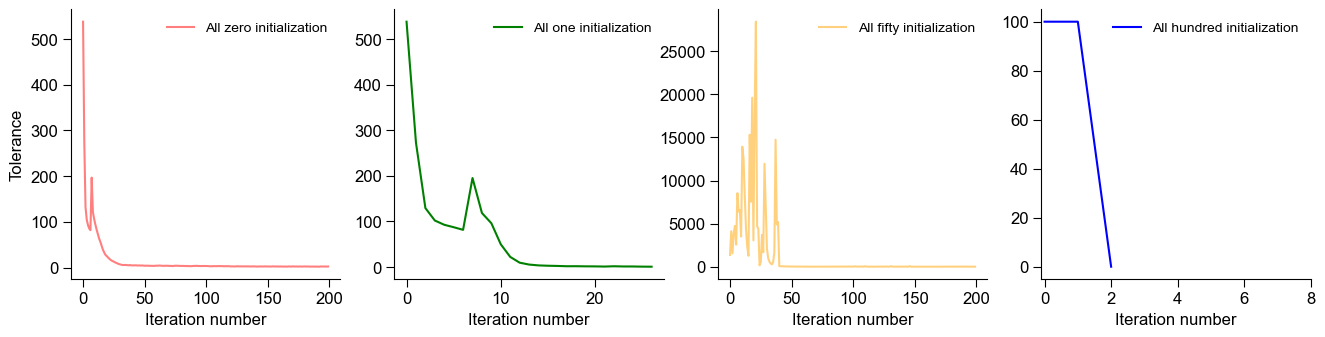

In [16]:
fig, ax= plt.subplots(figsize=(16,3.5),ncols=4)
ax[0].plot(np.arange(0,200,1),dge.tol_, c='red',label='All zero initialization',alpha=0.5)
ax[1].plot(np.arange(0,27,1),dge2.tol_, c='green',label='All one initialization')
ax[2].plot(np.arange(0,200,1),dge3.tol_, c='orange',label='All fifty initialization',alpha=0.5)
ax[3].plot(np.arange(0,3,1),dge4.tol_, c='blue', label='All hundred initialization')
ax[0].set_ylabel('Tolerance')
ax[3].set_xticks(range(0,10,2))
for i in range(4):
    ax[i].legend(frameon=False,fontsize = 'small',loc='upper right')
    ax[i].set_xlabel('Iteration number')
sns.despine(fig=fig)

In [17]:
my_avg_true = pd.DataFrame({'mean':(sim1.complex_count).mean(axis=1)})
my_avg_true['probeA'] = [s.split(':')[0] for s in my_avg_true.index]
my_avg_true['probeB'] = [s.split(':')[1] for s in my_avg_true.index]
my_avg_true = my_avg_true.pivot(index='probeA', columns='probeB', values='mean')

my_avg = pd.DataFrame({'mean':(dge.complex_count).mean(axis=1)})
my_avg['probeA'] = [s.split(':')[0] for s in my_avg.index]
my_avg['probeB'] = [s.split(':')[1] for s in my_avg.index]
my_avg = my_avg.pivot(index='probeA', columns='probeB', values='mean')

my_avg_2 = pd.DataFrame({'mean':(dge2.complex_count).mean(axis=1)})
my_avg_2['probeA'] = [s.split(':')[0] for s in my_avg_2.index]
my_avg_2['probeB'] = [s.split(':')[1] for s in my_avg_2.index]
my_avg_2 = my_avg_2.pivot(index='probeA', columns='probeB', values='mean')

my_avg_3 = pd.DataFrame({'mean':(dge3.complex_count).mean(axis=1)})
my_avg_3['probeA'] = [s.split(':')[0] for s in my_avg_3.index]
my_avg_3['probeB'] = [s.split(':')[1] for s in my_avg_3.index]
my_avg_3 = my_avg_3.pivot(index='probeA', columns='probeB', values='mean')

my_avg_4 = pd.DataFrame({'mean':(dge4.complex_count).mean(axis=1)})
my_avg_4['probeA'] = [s.split(':')[0] for s in my_avg_4.index]
my_avg_4['probeB'] = [s.split(':')[1] for s in my_avg_4.index]
my_avg_4 = my_avg_4.pivot(index='probeA', columns='probeB', values='mean')

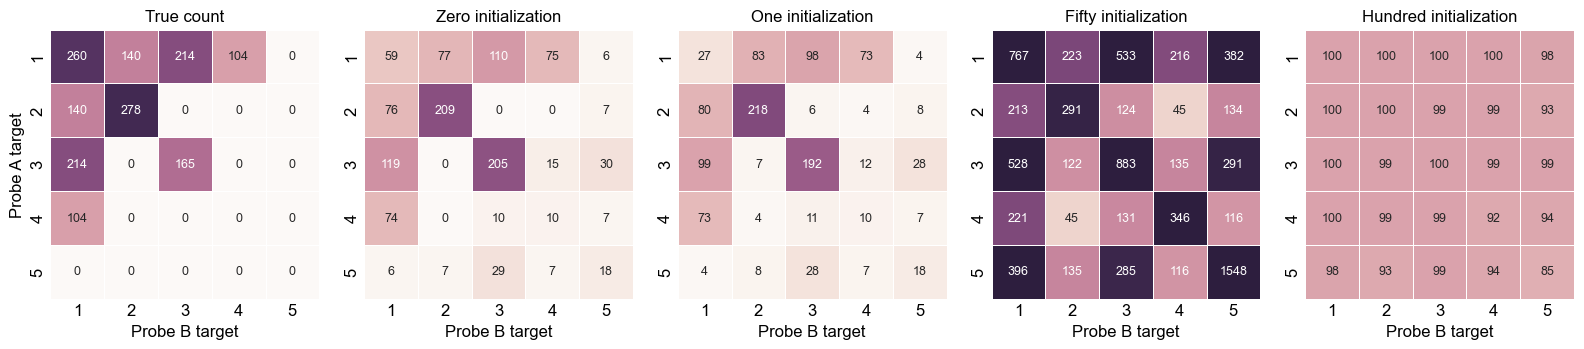

In [18]:
fig, ax = plt.subplots(ncols=5, figsize=(16,3.5))
sns.heatmap(my_avg_true, ax=ax[0],
            linewidths=0.5, square=True,
            cmap=sns.cubehelix_palette(light=.98, dark=0.15, as_cmap=True),
            annot=True, annot_kws={'fontsize':9},
            vmin=0, vmax=300, cbar=False, fmt='.0f'
            )
ax[0].set_title("True count")
sns.heatmap(my_avg, ax=ax[1],
            linewidths=0.5, square=True,
            cmap=sns.cubehelix_palette(light=.98, dark=0.15, as_cmap=True),
            annot=True, annot_kws={'fontsize':9},
            vmin=0, vmax=300, cbar=False, fmt='.0f'
            )
ax[1].set_title("Zero initialization")
sns.heatmap(my_avg_2, ax=ax[2],
            linewidths=0.5, square=True,
            cmap=sns.cubehelix_palette(light=.98, dark=0.15, as_cmap=True),
            annot=True, annot_kws={'fontsize':9},
            vmin=0, vmax=300, cbar=False, fmt='.0f'
            )
ax[2].set_title("One initialization")
sns.heatmap(my_avg_3, ax=ax[3],
            linewidths=0.5, square=True,
            cmap=sns.cubehelix_palette(light=.98, dark=0.15, as_cmap=True),
            annot=True, annot_kws={'fontsize':9},
            vmin=0, vmax=300, cbar=False, fmt='.0f'
            )
ax[3].set_title("Fifty initialization")
sns.heatmap(my_avg_4, ax=ax[4],
            linewidths=0.5, square=True,
            cmap=sns.cubehelix_palette(light=.98, dark=0.15, as_cmap=True),
            annot=True, annot_kws={'fontsize':9},
            vmin=0, vmax=300, cbar=False, fmt='.0f'
            )
ax[4].set_title("Hundred initialization")

for i in ax:
    i.set_xlabel("Probe B target")
    i.set_ylabel('')
    i.tick_params(axis='both', length=0)
ax[0].set_ylabel('Probe A target')
fig.tight_layout(w_pad=1.5)